In [30]:
from model import OpenDVC
import numpy as np
from load import load_local_data, load_data
import tensorflow as tf
import matplotlib.pyplot as plt

tf.executing_eagerly()

True

In [38]:
batch_size = 2
EPOCHS = 10
Height = 240
Width = 240
Channel = 3
lr_init = 1e-4
frames=6
I_QP=27



In [39]:
model = OpenDVC(width=Width, height=Height, batch_size=batch_size, num_filters=128)
model.compile()

In [47]:
# folder = ["/workspaces/tensorflow-wavelets/Development/OpenDVC/BasketballPass"]
folder = np.load("/mnt/WindowsDev/Developer/tensorflow-wavelets/folder_cloud.npy")

data = np.zeros([frames, batch_size, Height, Width, Channel])
# data = load_local_data(data, frames, batch_size, Height, Width, Channel, folder)
data = load_data(data, frames, batch_size, Height, Width, Channel, folder, I_QP)
dataset = tf.data.Dataset.from_tensor_slices(data).batch(2)

checkpoint_filepath = 'checkpoint/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    save_freq='epoch',
    monitor='train_loss_total',
    mode='max',
    save_best_only=True)

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
history = model.fit(dataset, epochs=EPOCHS, callbacks=[model_checkpoint_callback])
model.load_weights(checkpoint_filepath)


Epoch 1/10
3/3 [==============================] - 24s 8s/step - train_loss_total: 514502.0938 - train_loss_MV: 165328.8281 - train_loss_MC: 528198.5000 - psnr: -33.0291 - total_mse: 2009.7738 - warp_mse: 645.8157 - MC_mse: 2063.2754
Epoch 2/10
3/3 [==============================] - 24s 8s/step - train_loss_total: 501253.1250 - train_loss_MV: 165005.1875 - train_loss_MC: 527513.7500 - psnr: -32.9163 - total_mse: 1958.0200 - warp_mse: 644.5515 - MC_mse: 2060.6006
Epoch 3/10
3/3 [==============================] - 22s 7s/step - train_loss_total: 411779.9688 - train_loss_MV: 164644.5625 - train_loss_MC: 442806.5938 - psnr: -32.0500 - total_mse: 1608.5155 - warp_mse: 643.1428 - MC_mse: 1729.7133
Epoch 4/10
3/3 [==============================] - 23s 8s/step - train_loss_total: 288406.5938 - train_loss_MV: 164006.7656 - train_loss_MC: 312937.6250 - psnr: -30.4817 - total_mse: 1126.5883 - warp_mse: 640.6514 - MC_mse: 1222.4126
Epoch 5/10
3/3 [==============================] - 23s 8s/step - trai

Model: "open_dvc_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
analysis (AnalysisTransform) (2, 15, 15, 128)          659456    
_________________________________________________________________
synthesis (SynthesisTransfor (2, 240, 240, 2)          642824    
_________________________________________________________________
analysis (AnalysisTransform) (2, 15, 15, 128)          1552640   
_________________________________________________________________
synthesis (SynthesisTransfor (2, 240, 240, 3)          1536015   
_________________________________________________________________
optical_flow_7 (OpticalFlow) multiple                  240050    
_________________________________________________________________
motion_compensation_7 (Motio multiple                  486467    
Total params: 5,121,036
Trainable params: 5,121,036
Non-trainable params: 0
______________________________________________

Epoch 1/10
3/3 [==============================] - 27s 9s/step - train_loss_total: 1523393.1250 - train_loss_MV: 110878.1875 - train_loss_MC: 1545334.6250 - psnr: -37.7397 - total_mse: 5950.7544 - warp_mse: 433.1179 - MC_mse: 6036.4634
Epoch 2/10
3/3 [==============================] - 24s 8s/step - train_loss_total: 1349340.3750 - train_loss_MV: 111009.2734 - train_loss_MC: 1421023.8750 - psnr: -37.2159 - total_mse: 5270.8608 - warp_mse: 433.6300 - MC_mse: 5550.8745
Epoch 3/10
3/3 [==============================] - 25s 8s/step - train_loss_total: 1265307.3750 - train_loss_MV: 110222.6641 - train_loss_MC: 1398132.1250 - psnr: -36.9350 - total_mse: 4942.6069 - warp_mse: 430.5573 - MC_mse: 5461.4536
Epoch 4/10
3/3 [==============================] - 23s 7s/step - train_loss_total: 928184.6875 - train_loss_MV: 108885.6641 - train_loss_MC: 1093462.5000 - psnr: -35.5568 - total_mse: 3625.7214 - warp_mse: 425.3346 - MC_mse: 4271.3379
Epoch 5/10
3/3 [==============================] - 24s 8s/step

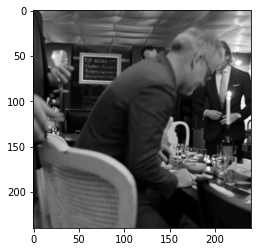

In [14]:
plt.imshow(elem[1,0,:,:,:].numpy().astype("uint8"))